In [20]:
import numpy as np
#from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
import seaborn as sns
import umap 
#import umap 


/CTGlab/home/valeria/miniconda3/envs/q_env_repo_test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set seed
seed=42

In [3]:
def Visual_comp(data_t,n_var,clusters,tag):
    #Plot first two components of given reduction algorithm and colors points according to given cluster
    col=[]
    for i in range(1,n_var+1):
        name='Component_'+str(i)
        col.append(name)
    pc_df = pd.DataFrame(data =data_t , columns =col ) 
    pc_df['Cluster'] =clusters
    pc_df.head()
    #plot pca
    sns.lmplot( x="Component_1", y="Component_2",
    data=pc_df, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='Cluster', # color by cluster
    legend=True,
    scatter_kws={"s": 80}).set(title='First two components of '+tag)
  
    return pc_df

# Load METABRIC

Load data from metabric:

* Exprexpression dat

* CNV


In [4]:
#Expression
data_exp=pd.read_csv("/CTGlab/data/brca_metabric/data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt",sep='\t')
#CNV
data_cnv=pd.read_csv("/CTGlab/data/brca_metabric/data_cna.txt",sep='\t')

In [5]:
data_cnv

,Hugo_Symbol,Entrez_Gene_Id,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,...,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
0,A1BG,1.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,503538.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A1CF,29974.0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,A2M,2.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A2M-AS1,144571.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,ZYG11A,NaN,0,0,1,0,0,0,1,1,...,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
22540,ZYG11B,79699.0,0,0,-1,0,0,0,1,1,...,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
22541,ZYX,7791.0,0,-1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
22542,ZZEF1,23140.0,0,0,-2,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


Load meta data (Clinical data)

In [6]:
data_clin=pd.read_csv("/CTGlab/data/brca_metabric/data_clinical_sample.txt",sep='\t',skiprows=4)

In [7]:
data_clin.set_index('SAMPLE_ID',inplace=True)

In [8]:
data_clin

,PATIENT_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
SAMPLE_ID,,,,,,,,,,,,
MB-0000,MB-0000,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Negative,Primary,22.0,2.0,0.000000
MB-0002,MB-0002,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
MB-0005,MB-0005,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
MB-0006,MB-0006,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
MB-0008,MB-0008,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2428,MTS-T2428,Breast Cancer,Invasive Breast Carcinoma,Positive,NaN,1.0,BRCA,NaN,Primary,27.0,1.0,2.615035
MTS-T2429,MTS-T2429,Breast Cancer,Invasive Breast Carcinoma,Positive,NaN,2.0,BRCA,NaN,Primary,28.0,2.0,5.230071
MTS-T2430,MTS-T2430,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,BRCA,NaN,Primary,NaN,0.0,7.845106


In [9]:
#bind index colums
data_exp['hugo_entrez_combo']=data_exp.Hugo_Symbol+'_'+data_exp.Entrez_Gene_Id.astype(str)
data_cnv['hugo_entrez_combo']=data_cnv.Hugo_Symbol+'_'+data_cnv.Entrez_Gene_Id.astype(str)
data_exp.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)
data_cnv.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)

Select samples present in both datasets

In [10]:
samples=list(set(data_exp.columns) & set(data_cnv.columns))
data_exp_sub=data_exp[samples]
data_cnv_sub=data_cnv[samples]
samples.remove('hugo_entrez_combo')

In [11]:
data_clin=data_clin[data_clin.index.isin(samples)]


In [12]:
print('RNA data dim:',data_exp_sub.shape)
print('CNA data dim:',data_cnv_sub.shape)

RNA data dim: (20603, 1981)
CNA data dim: (22544, 1981)


In [13]:
gene_com_id=list(set(data_exp_sub.hugo_entrez_combo) & set(data_cnv_sub.hugo_entrez_combo))
print('common features: ',len(gene_com_id))

common features:  0


In [14]:
data_exp_sub.drop('hugo_entrez_combo',axis=1).describe()

,MB-5468,MB-5183,MB-0400,MB-4235,MB-6179,MB-0192,MB-5039,MB-3064,MB-4742,MB-7006,...,MB-0097,MB-7280,MB-5117,MB-2954,MB-0654,MB-7201,MB-0365,MB-4746,MB-0317,MB-4622
count,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,...,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000
mean,0.078478,0.008228,0.045420,0.011416,-0.002107,-0.012663,0.043190,-0.050515,-0.053625,-0.040192,...,0.035458,-0.006559,-0.053110,0.005858,-0.039166,0.008467,-0.007813,-0.035793,-0.049466,-0.002948
std,1.122443,0.862518,1.108811,0.998418,0.885094,0.927963,1.111796,0.819485,0.861527,0.811361,...,1.065993,0.906796,0.813623,0.988903,0.846637,1.157304,0.925677,0.786963,0.926894,1.188791
min,-4.118500,-4.232600,-4.410700,-4.555100,-3.443100,-4.504500,-4.572300,-3.627000,-3.803800,-3.488800,...,-4.918900,-3.839600,-4.390500,-4.261500,-3.568900,-3.853200,-3.569200,-8.179300,-3.373800,-3.838300
25%,-0.683200,-0.568750,-0.712450,-0.666850,-0.597000,-0.605650,-0.703700,-0.586900,-0.640850,-0.579400,...,-0.680250,-0.617900,-0.585850,-0.683550,-0.610700,-0.769000,-0.625500,-0.537100,-0.669250,-0.770200
50%,-0.032300,-0.055100,-0.067600,-0.050500,-0.066300,-0.099100,-0.078000,-0.116900,-0.100500,-0.091800,...,-0.075600,-0.072000,-0.101900,-0.075400,-0.097000,-0.108500,-0.111800,-0.077200,-0.126900,-0.132200
75%,0.716000,0.545550,0.704800,0.635800,0.537800,0.471100,0.676400,0.426500,0.502050,0.467750,...,0.656800,0.541350,0.438700,0.623650,0.505200,0.674900,0.514650,0.420800,0.501750,0.628650
max,12.132900,22.062600,8.559800,8.483300,5.185300,8.036300,11.317700,6.276300,6.994800,6.460500,...,18.370200,5.625500,6.759200,16.724000,5.783400,12.801300,11.832600,7.492200,20.541700,16.954100


Reset index and replace nan values

In [15]:
#SET hugo+entrez as index
data_exp_sub.set_index('hugo_entrez_combo',inplace=True)
data_cnv_sub.set_index('hugo_entrez_combo',inplace=True)
#drop nan
if data_exp_sub.isnull().values.any():
    data_exp_sub=data_exp_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

if data_cnv_sub.isnull().values.any():
    data_cnv_sub=data_cnv_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

In [16]:
data_exp_sub.isnull().values.any()

False

In [17]:
data_clin_patient=pd.read_csv('/CTGlab/data/brca_metabric/data_clinical_patient.txt',sep='\t',skiprows=4,index_col='PATIENT_ID')
ic10=data_clin_patient['INTCLUST']
ic10.dropna(inplace=True)
ic10.unique()
ic10.replace('4ER+','4',inplace=True)
ic10.replace('4ER-','4',inplace=True)

# Dimensionality reduction

## UMAP

In [20]:
data_full=data_exp_sub.T.join(data_cnv_sub.T,how='inner')
data_full

hugo_entrez_combo,RERE_473,RNF165_494470,PHF7_51533,CIDEA_1149,TENT2_167153,SLC17A3_10786,SDS_10993,ATP6V1C2_245973,F3_2152,FAM71C_196472,...,ZWILCH_55055.0,ZWINT_11130.0,ZXDA_7789.0,ZXDB_158586.0,ZXDC_79364.0,ZYG11A_nan,ZYG11B_79699.0,ZYX_7791.0,ZZEF1_23140.0,ZZZ3_26009.0
MB-6152,-0.9437,0.4291,-0.0453,-0.7075,-1.3802,0.0897,1.5197,0.5167,0.6049,0.2022,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
MB-0100,-0.5710,1.9778,0.4454,1.3685,-0.2766,0.2501,-1.5297,0.8223,-0.1856,0.7829,...,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0642,1.4711,0.2000,0.1861,-0.8742,0.6416,1.1413,-1.0357,-0.3165,-0.8164,0.9542,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
MB-0242,-0.3895,-0.3285,-0.4112,1.3068,1.3883,0.7556,0.5304,-0.2241,-0.5488,0.6259,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-5656,2.2687,0.7594,-0.4237,-0.5309,0.4074,-1.0867,-1.1013,0.0687,1.7313,0.3483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6059,-1.6124,-1.0763,-0.5274,-0.3685,-0.1319,-1.3788,2.1513,-0.1473,1.0931,0.0776,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
MB-4098,0.6951,3.6394,4.1859,-0.8940,-3.1751,0.6388,-0.5048,-0.5433,-0.7525,-0.1344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-7241,0.4532,-1.3201,0.4519,0.3763,-0.0818,-0.1590,-0.4938,-0.4631,0.4196,-0.0872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
MB-4762,1.4620,0.3285,1.1536,-0.9383,0.1098,0.4391,-0.9220,0.1056,-0.2945,-0.2603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
mapper=umap.UMAP(n_components=4, random_state=seed).fit(data_full)
data_umap= mapper.transform(data_full)

Plot with ic10

In [51]:
col_umap=[]
for i in range(1,data_umap.shape[1]+1):
    col_umap.append('Component_{}'.format(i))
data_umap_df=pd.DataFrame(data_umap,columns=col_umap,index=data_full.index)
data_umap_df=data_umap_df.join(ic10.astype(int),how='inner')
data_umap_df.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)


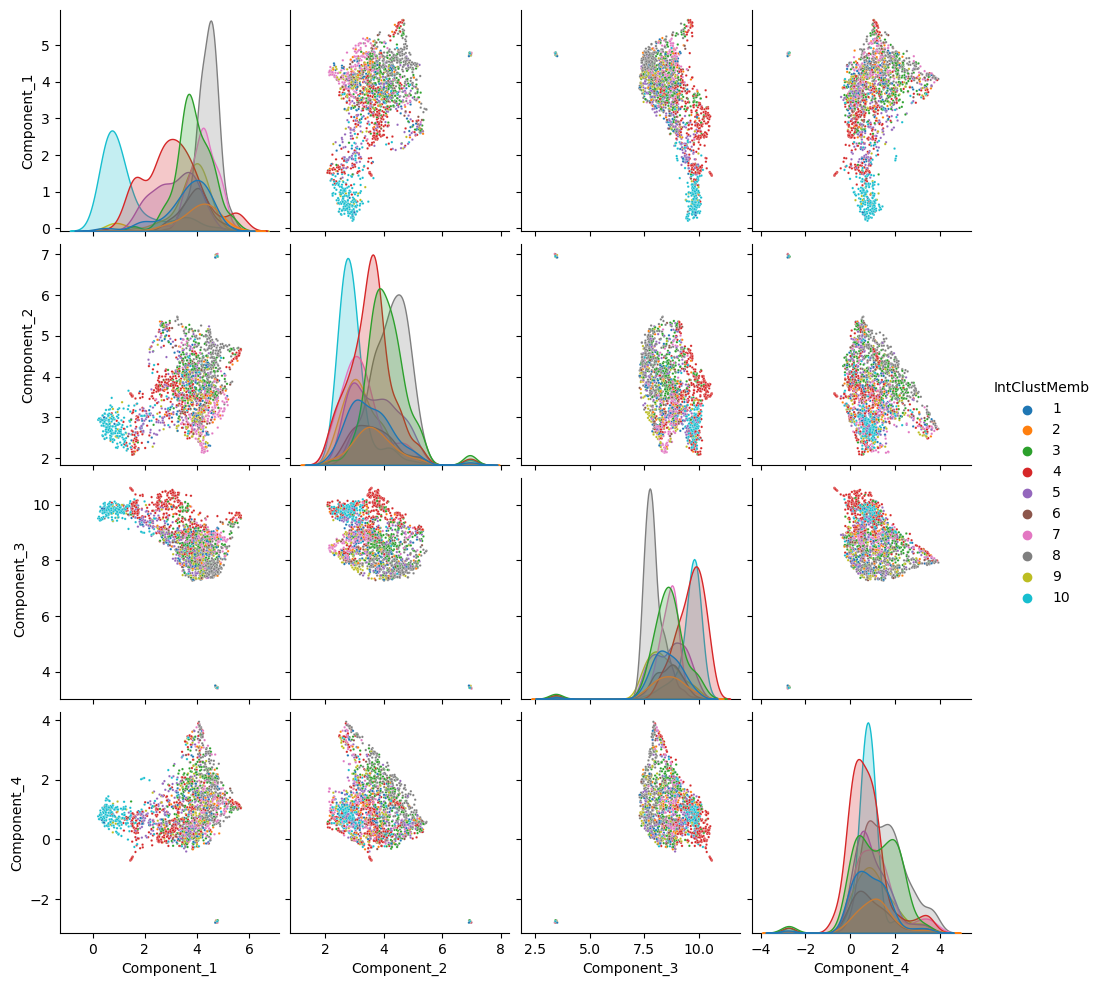

In [52]:
sns.pairplot(data_umap_df,hue='IntClustMemb',palette='tab10',plot_kws={"s": 3})

In [ ]:
#save ic10
data_umap_df.to_csv('./UMAP_METABRIC_4cmp_IC10_full.csv',sep=',')